In [1]:
import tensorflow as tf

2023-05-19 11:58:42.091445: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 11:58:42.698463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-19 11:58:42.701103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 11:58:46.479220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(tf.__version__)

2.12.0


In [3]:
from tensorflow import keras

In [4]:
print(tf.keras.__version__)

2.12.0


In [5]:
import numpy as np

In [6]:
print(np.__version__)

1.22.3


In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
import matplotlib.pyplot as plt

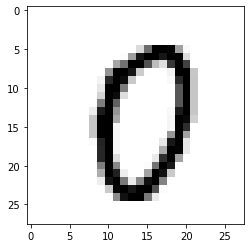

In [9]:
plt.imshow(x_train[1000], cmap= plt.cm.binary)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train_vec = x_train.reshape(60000, 784)
x_test_vec = x_test.reshape(10000, 784)

In [14]:
x_train_vec.shape

(60000, 784)

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [16]:
y_train[0]

5

In [17]:
y_train_vec = to_categorical(y_train, num_classes=10)
y_test_vec = to_categorical(y_test,num_classes=10)

In [18]:
y_train_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
# pasar en la primera capa de "sigmoid" a "relu"
# aumentar perceptrones en la primera capa de 10 a 512
# aumentar el número de epochs a 20
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [26]:
model.fit(x_train_vec, y_train_vec, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0469 - accuracy: 0.9886
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9889
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9892
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0435 - accuracy: 0.9896
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9900
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - accuracy: 0.9904
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9905
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0395 - accuracy: 0.9909
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0386 - accuracy: 0.9910
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.037

In [27]:
test_loss, test_acc = model.evaluate(x_test_vec, y_test_vec)

313/313 [==============================] - 1s 2ms/step - loss: 0.0656 - accuracy: 0.9805


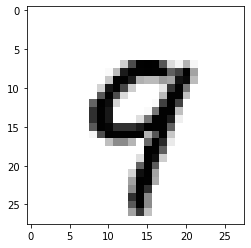

In [28]:
plt.imshow(x_test[12], cmap=plt.cm.binary)

In [29]:
predictions = model.predict(x_test_vec)

313/313 [==============================] - 1s 2ms/step


In [30]:
np.argmax(predictions[12])

9

In [31]:
np.sum(predictions[11])

1.0

In [35]:
# SALVANDO TODO EN FORMATO TENSORFLOW TF
model.save("mnist_model.tf")

INFO:tensorflow:Assets written to: mnist_model.tf/assets


INFO:tensorflow:Assets written to: mnist_model.tf/assets


In [36]:
from tensorflow.keras.models import load_model
mnist_model = load_model("mnist_model.tf")

In [37]:
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
# SALVANDO TODO EN FORMATO KERAS H5
model.save("mnist_model.h5")

In [39]:
from tensorflow.keras.models import load_model
mnist_model = load_model("mnist_model.h5")

In [40]:
# SALVANDO SOLO EL MODELO EN FORMATO JSON
from tensorflow.keras.models import model_from_json

mnist_model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(mnist_model_json)

In [41]:
json_file = open('mnist_model.json', 'r')
mnist_model_json = json_file.read()
json_file.close()
mnist_model = model_from_json(mnist_model_json)

In [42]:
# SALVANDO SOLO LOS WEIGHTS DEL MODELO
model.save_weights("mnist_weights.h5")

In [43]:
mnist_model.load_weights("mnist_weights.h5")